<a href="https://colab.research.google.com/github/susmitha8176/trial/blob/master/Copy_of_Sdc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

# Library Import

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn.svm import LinearSVC 
from sklearn.svm import NuSVC

from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split

#DATA IMPORTS

In [0]:
train = pd.read_csv('/content/drive/My Drive/train.csv')
test = pd.read_csv('/content/drive/My Drive/test.csv')
#exp = pd.read_csv('/content/drive/My Drive/Project_12/Dataset/example_submission.csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
len(train)

604329

# Data preprocessing

In [0]:
new_df = pd.DataFrame()
noalert = train.index[train['IsAlert'] == 0]
turnnoalert = train.iloc[noalert-1 & train['IsAlert'] == 1] 
for i in turnnoalert.index:
    new_df = new_df.append(train[i-5:i+6])   
new_df = new_df.drop_duplicates()
sum(new_df.isna())

In [0]:
pcadata = new_df.drop(columns = ['TrialID', 'ObsNum', 'IsAlert']) # Drop unneccessary columns
X_scaled = preprocessing.scale(pcadata) 
pcadata.info()

In [0]:
pcadata.info()

In [0]:
pca=PCA() 
pca.fit(X_scaled)


In [0]:
X_pca=pca.transform(X_scaled) 
print ("shape of X_pca", X_pca.shape)
y = pca.explained_variance_ratio_

x = np.array([i for i in range(1, len(y)+1)])

plt.plot(x, y, 'r-x')

# Filter principle components

In [0]:
sum(pca.explained_variance_ratio_[:14])
X_pca = X_pca[:,:14] 
X_pca.shape 

X_pca 
new_df.IsAlert

In [0]:
skf = StratifiedKFold(n_splits=10)
params = {}
nb = GaussianNB()
gs = GridSearchCV(nb, cv=skf, param_grid=params, return_train_score=True)

x_train, x_test, y_train, y_test = train_test_split(X_pca, new_df.IsAlert, random_state = 42)

In [0]:
nusvc = NuSVC(gamma = 'scale')
nusvcgridsearch = GridSearchCV(nusvc, cv = skf, param_grid = params, return_train_score = True)
nusvcgridsearch.fit(x_train, y_train)

In [0]:
nusvcgridsearch.cv_results_

In [0]:
nusvc_predict = nusvcgridsearch.predict(X_pca)
confusion_matrix(new_df.IsAlert, nusvc_predict)

In [0]:
roc_auc_score(new_df.IsAlert, nusvc_predict)

In [0]:
from sklearn.svm import SVR
from sklearn.svm import SVC

# epsilon - SVR


In [0]:
svr = SVR(gamma='scale', C=1.0, epsilon=0.2)
svrgridsearch = GridSearchCV(svr, cv = skf, param_grid = params, return_train_score = True)
svrgridsearch.fit(x_train, y_train)

In [0]:
svrgridsearch.cv_results_

In [0]:
svrgridsearch.score(X_pca, new_df.IsAlert)

In [0]:
svr_predict = svrgridsearch.predict(X_pca)

confusion_matrix(new_df.IsAlert, svr_predict)

In [0]:
roc_auc_score(new_df.IsAlert, svr_predict)

In [0]:
# C - SVC
svc = SVC(gamma='auto')
svcgridsearch = GridSearchCV(svc, cv = skf, param_grid = params, return_train_score = True)
svcgridsearch.fit(x_train, y_train)

In [0]:
svcgridsearch.cv_results_

In [0]:
svcgridsearch.score(X_pca, new_df.IsAlert)

In [0]:
svc_predict = svcgridsearch.predict(X_pca)
confusion_matrix(new_df.IsAlert, svc_predict)

In [0]:
roc_auc_score(new_df.IsAlert, svc_predict)


In [0]:
from sklearn.neural_network import MLPClassifier

nn1 = MLPClassifier(solver='adam', alpha=1e-5,activation = 'logistic',hidden_layer_sizes=(14, 14, 12, 10, 5), random_state=1)
nngridsearch = GridSearchCV(nn1, cv = skf, param_grid = params, return_train_score = True)

In [0]:
nngridsearch.fit(x_train, y_train)

In [0]:
nngridsearch.cv_results_

In [0]:
nngridsearch.score(X_pca, new_df.IsAlert)

In [0]:
nn_predict = nngridsearch.predict(X_pca)

confusion_matrix(new_df.IsAlert, nn_predict)

In [0]:
roc_auc_score(new_df.IsAlert, nn_predict)

Model 2

Use rolling means and std of each attribute as new features


In [7]:
#train_2 = train[train['TrialID'] <= 1]
train_new = pd.DataFrame() # New df
#train_new
for i in range(0, max(train.TrialID)+1): # Within each trial
    temp_data = train[train['TrialID'] == i] # Create a temporary df for each trial
    for j in list(train)[3:]: # For all the attributes of each trial
#        print (train_2[train_2['TrialID'] == i][j])
        temp_data['m{}'.format(j)] = train[train['TrialID'] == i][j].rolling(window = 5).mean() # Create the Rolling mean
        temp_data['sd{}'.format(j)] = train[train['TrialID'] == i][j].rolling(window = 5).std() # Create the Rolling Std
    train_new = train_new.append(temp_data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [0]:
train_new = train_new.fillna(0) # Missing Value

# Data partition


In [0]:
train_new = train_new.drop(columns = ['TrialID', 'ObsNum', 'IsAlert']) # Drop unneccessary columns

X_train, X_test, y_train, y_test = train_test_split(train_new, train.IsAlert, test_size = 0.2, random_state = 23)

In [10]:
train_new

,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,mP1,sdP1,mP2,sdP2,mP3,sdP3,mP4,sdP4,mP5,sdP5,...,mE3,sdE3,mE4,sdE4,mE5,sdE5,mE6,sdE6,mE7,sdE7,mE8,sdE8,mE9,sdE9,mE10,sdE10,mE11,sdE11,mV1,sdV1,mV2,sdV2,mV3,sdV3,mV4,sdV4,mV5,sdV5,mV6,sdV6,mV7,sdV7,mV8,sdV8,mV9,sdV9,mV10,sdV10,mV11,sdV11
0,34.7406,9.84593,1400,42.8571,0.290601,572,104.8950,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.96,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.000,0.000000,0.000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000e+00,0.00000,0.000000
1,34.4215,13.41120,1400,42.8571,0.290601,572,104.8950,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.98,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.000,0.000000,0.000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000e+00,0.00000,0.000000
2,34.3447,15.18520,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.97,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.000,0.000000,0.000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000e+00,0.00000,0.000000
3,34.3421,8.84696,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.99,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.000,0.000000,0.000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000e+00,0.00000,0.000000
4,34.3322,14.69940,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,102.07,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757,34.43622,0.173867,12.397738,2.881599,1400.0,0.000000,42.8571,0.000000,0.290601,0.000000,...,1.0,0.000000e+00,-20.0,0.0,0.015875,0.0,324.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000e+00,57.0,0.000000,0.0,0.0,101.994,0.043932,0.231,0.145576,752.0,0.000000,5.99375,0.000000,0.0,0.000000e+00,2011.0,5.099020,0.0,0.0,13.40,0.000000,0.0,0.0,4.0,0.000000e+00,14.77786,0.013039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.51,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8113,32.00594,0.015251,12.199390,4.141035,696.0,142.407865,89.4444,19.778809,0.094185,0.017054,...,0.0,6.322027e-08,0.0,0.0,0.016379,0.0,322.8,0.447214,2.0,0.0,2.0,0.0,1.0,7.450581e-09,64.0,0.000001,0.0,0.0,91.378,0.092033,0.196,0.046957,240.0,0.000041,3.01875,0.000001,0.0,1.580507e-08,1794.2,3.834058,0.0,0.0,29.84,0.371484,0.0,0.0,4.0,3.204616e-08,15.82584,0.011552
604325,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.51,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8018,32.01616,0.017366,11.173110,2.933390,748.0,116.275535,82.2222,16.149330,0.087958,0.013924,...,0.0,6.322027e-08,0.0,0.0,0.016379,0.0,322.6,0.547723,2.0,0.0,2.0,0.0,1.0,7.450581e-

# Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 50, random_state = 42)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

# Accuracy

In [0]:
forest.score(X_test, y_test)

0.9891615508083332

In [0]:
for_predict = forest.predict(X_test)


In [0]:
# Confusion Matrix
confusion_matrix(y_test, for_predict)

array([[49663,  1247],
       [   63, 69893]])

In [0]:
#AUC score
roc_auc_score(y_test, for_predict)


0.987302614234641

In [0]:
from sklearn.linear_model import LogisticRegression


In [0]:
logr = LogisticRegression(random_state=0, solver='saga').fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [0]:
logr.score(X_test, y_test)


0.6120745288170371

In [0]:
logr_pred = logr.predict(X_test)

In [0]:
confusion_matrix(y_test, logr_pred)

array([[21363, 29547],
       [17340, 52616]])

In [0]:
roc_auc_score(y_test, logr_pred)

0.5858763870533589

Naïve Bayes



In [0]:
from sklearn.naive_bayes import GaussianNB

In [0]:
nb2 = GaussianNB()
nb2.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
nb2.score(X_test, y_test)

0.6286300531166746

In [0]:
nb2_pred = nb2.predict(X_test)

In [0]:
confusion_matrix(y_test, nb2_pred)

array([[44303,  6607],
       [38279, 31677]])

In [0]:
roc_auc_score(y_test, nb2_pred)

0.6615175785943694

Nu-SVC

In [0]:
nusvc2 = NuSVC(gamma = 'scale')

In [0]:
nusvc2.fit(X_train, y_train)

In [0]:
nusvc2.score(X_test, y_test)

In [0]:
nusvc2_pred = nusvc2.predict(X_test)

In [0]:
confusion_matrix(y_test, nusvc2_pred)

In [0]:
roc_auc_score(y_test, nb2_pred)

Linear-SVC

In [0]:
from sklearn.svm import LinearSVC
lisvc2 = LinearSVC(random_state=42, tol=1e-5)

In [0]:
lisvc2.fit(X_train, y_train)

In [0]:
lisvc2.score(X_test, y_test)

In [0]:
lisvc2_pred = lisvc2.predict(X_test)

In [0]:
confusion_matrix(y_test, lisvc2_pred)

In [0]:
roc_auc_score(y_test, lisvc2_pred)

C-SVC

In [0]:
from sklearn.svm import SVC 

svc2 = SVC(gamma='auto')

In [0]:
svc2.fit(X_train, y_train)

In [0]:
svc2_pred = svc2.predict(X_test)

In [0]:
svc2.score(X_test, y_test)

In [0]:
confusion_matrix(y_test, svc2_pred)

In [0]:
roc_auc_score(y_test, svc2_pred)

Neural Network

With four hidden layers 90 - 70 - 50 - 30

In [0]:
from sklearn.neural_network import MLPClassifier

In [13]:
nn2 = MLPClassifier(solver='adam', alpha=1e-5,activation = 'logistic',hidden_layer_sizes=(90, 70, 50, 30), random_state=1)
nn2.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(90, 70, 50, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
nn2_predict = nn2.predict(X_test)


In [15]:
nn2.score(X_test, y_test)

0.8347922492677842

In [16]:
confusion_matrix(y_test, nn2_predict)

array([[41678,  9232],
       [10736, 59220]])

In [17]:
roc_auc_score(y_test, nn2_predict)

0.8325962434798789

Model & Data exportation

In [0]:
train_new['IsAlert'] = train['IsAlert']

In [0]:
from joblib import dump, load

In [0]:
from google.colab import drive

In [21]:
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

Mounted at /content/gdrive


In [0]:
base_dir = root_dir + 'fastai-v3/'

In [0]:
from pathlib import Path
path = Path(base_dir + 'data/bears')
dest = path/'featuretrain.csv'
dest.mkdir(parents=True, exist_ok=True)

In [0]:
train_new.to_csv('featuredtrain.csv') # Dataset exportation

In [25]:
dump(forest, 'mstdforest.joblib') # Model exportation
dump(nn2, 'mstdnn.joblib')

['mstdnn.joblib']

In [26]:
t_sc = preprocessing.scale(train_new) 
pca_2=PCA() 
pca_2.fit(t_sc) 

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
t_pca=pca_2.transform(t_sc)

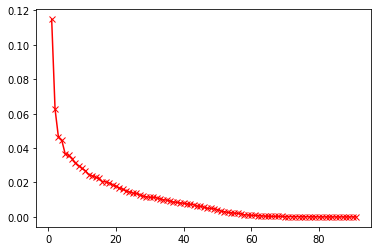

In [28]:
y = pca_2.explained_variance_ratio_

x = np.array([i for i in range(1, len(y)+1)])

plt.plot(x, y, 'r-x')

In [29]:
sum(pca_2.explained_variance_ratio_[:30])

0.8191932024944611

In [30]:
t_pca = t_pca[:,:14]
t_pca.shape

(604329, 14)